# Word Frequencies and Zipf's Law

In [1]:
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import brown
sns.set_style("whitegrid")

In [2]:
brown.words()[0:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [3]:
raw_counts = Counter([x.lower() for x in brown.words() if x.isalpha()])

In [4]:
print("{:,} total word types in vocabulary for Brown Corpus".format(len(raw_counts)))

40,234 total word types in vocabulary for Brown Corpus


In [5]:
print("{:,} total word tokens in Brown Corpus".format(sum(raw_counts.values())))

981,716 total word tokens in Brown Corpus


## Measure corpus coverage as a function of vocabulary size

In [6]:
percentiles = list(np.linspace(0,0.8,17)) + list(np.linspace(0.85,1,16))
count_vals = pd.Series(list(raw_counts.values()))
thresholds = count_vals.quantile(percentiles)
thresholds

0.00        1.0
0.05        1.0
0.10        1.0
0.15        1.0
0.20        1.0
0.25        1.0
0.30        1.0
0.35        1.0
0.40        2.0
0.45        2.0
0.50        2.0
0.55        3.0
0.60        3.0
0.65        4.0
0.70        5.0
0.75        7.0
0.80       10.0
0.85       15.0
0.86       16.0
0.87       17.0
0.88       19.0
0.89       22.0
0.90       24.0
0.91       28.0
0.92       33.0
0.93       38.0
0.94       44.0
0.95       53.0
0.96       66.0
0.97       85.0
0.98      125.0
0.99      226.0
1.00    69971.0
dtype: float64

In [7]:
def calc_coverage(row):
    N = sum(list(raw_counts.values()))
    coverage = sum([v for v in raw_counts.values() if v > row["count_threshold"]]) / N
    return coverage

In [8]:
result_df = pd.DataFrame({"percent": percentiles, "count_threshold": thresholds})
result_df["coverage"] = result_df.apply(calc_coverage, axis=1)

In [9]:
result_df

,percent,count_threshold,coverage
0.00,0.00,1.0,0.984347
0.05,0.05,1.0,0.984347
0.10,0.10,1.0,0.984347
0.15,0.15,1.0,0.984347
0.20,0.20,1.0,0.984347
0.25,0.25,1.0,0.984347
0.30,0.30,1.0,0.984347
0.35,0.35,1.0,0.984347
0.40,0.40,2.0,0.972301
0.45,0.45,2.0,0.972301


In [10]:
clean_df = result_df.groupby("count_threshold").last().reset_index()
clean_df

,count_threshold,percent,coverage
0,1.0,0.35,0.984347
1,2.0,0.50,0.972301
2,3.0,0.60,0.961901
3,4.0,0.65,0.952999
4,5.0,0.70,0.944722
5,7.0,0.75,0.930249
6,10.0,0.80,0.912732
7,15.0,0.85,0.888780
8,16.0,0.86,0.883777
9,17.0,0.87,0.879586


In [11]:
clean_df = clean_df.append({"count_threshold":0, "percent":0, "coverage": 1}, ignore_index=True)
clean_df["percent_words_retained"] = 1 - clean_df["percent"]
clean_df = clean_df.sort_values("count_threshold")
clean_df

,count_threshold,percent,coverage,percent_words_retained
23,0.0,0.00,1.000000,1.00
0,1.0,0.35,0.984347,0.65
1,2.0,0.50,0.972301,0.50
2,3.0,0.60,0.961901,0.40
3,4.0,0.65,0.952999,0.35
4,5.0,0.70,0.944722,0.30
5,7.0,0.75,0.930249,0.25
6,10.0,0.80,0.912732,0.20
7,15.0,0.85,0.888780,0.15
8,16.0,0.86,0.883777,0.14


In [12]:
clean_df[["count_threshold", "percent", "coverage"]].set_index("count_threshold")

,percent,coverage
count_threshold,,
0.0,0.00,1.000000
1.0,0.35,0.984347
2.0,0.50,0.972301
3.0,0.60,0.961901
4.0,0.65,0.952999
5.0,0.70,0.944722
7.0,0.75,0.930249
10.0,0.80,0.912732
15.0,0.85,0.888780


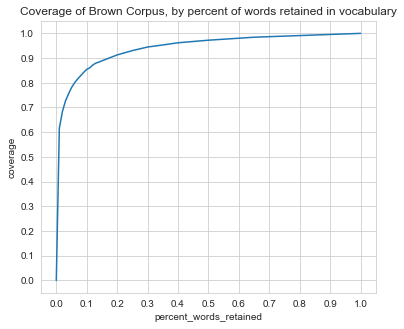

In [13]:
plt.figure(figsize=(6,5))
sns.lineplot(data=clean_df, x="percent_words_retained", y="coverage")
plt.title("Coverage of Brown Corpus, by percent of words retained in vocabulary")
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.show()

## Demonstrate Zipf's Law

### Get ranks and counts for each word

In [14]:
count_data = [{"word": k, "count": v} for k, v in raw_counts.items()]
count_df = pd.DataFrame(count_data).sort_values("count", ascending=False)
count_df["rank"] = count_df["count"].rank(ascending=False)

In [15]:
count_df.head(10).set_index("word")

,count,rank
word,,
the,69971,1.0
of,36412,2.0
and,28853,3.0
to,26158,4.0
a,23195,5.0
in,21337,6.0
that,10594,7.0
is,10109,8.0
was,9815,9.0


### Plot frequencies for top words

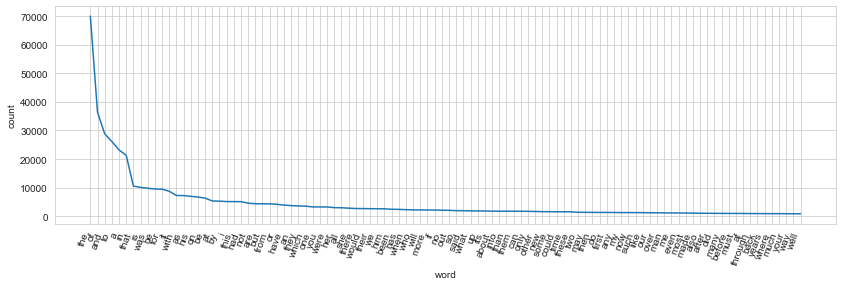

In [16]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(111)
sns.lineplot(data=count_df.head(100), x="word", y="count", sort=False)
# lineplot.set_xticklabels(lineplot.get_xticklabels(), rotation=0)
plt.setp(ax.get_xticklabels(), ha="right", rotation=70)
plt.show()

### Plot ranks vs. counts (log-log)

In [48]:
count_df.head(100)

,word,count,rank,ratio
0,the,69971,1.0,69971.0
9,of,36412,2.0,72824.0
32,and,28853,3.0,86559.0
48,to,26158,4.0,104632.0
56,a,23195,5.0,115975.0
...,...,...,...,...
482,where,937,96.5,90420.5
1333,much,937,96.5,90420.5
1309,your,923,98.0,90454.0
1350,way,908,99.0,89892.0


<AxesSubplot:xlabel='count', ylabel='rank'>

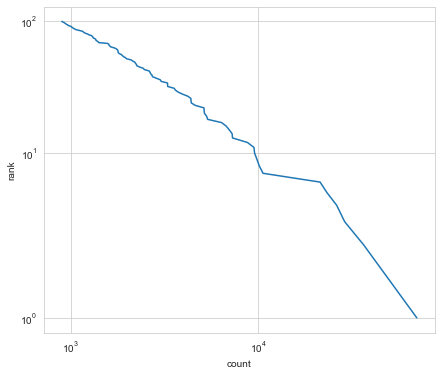

In [52]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.set(xscale="symlog", yscale="symlog")
sns.lineplot(data=count_df.head(100), x="count", y="rank")

In [18]:
count_df["ratio"] = count_df["count"] * count_df["rank"]

In [19]:
count_df.head(20).set_index("word")

,count,rank,ratio
word,,,
the,69971,1.0,69971.0
of,36412,2.0,72824.0
and,28853,3.0,86559.0
to,26158,4.0,104632.0
a,23195,5.0,115975.0
in,21337,6.0,128022.0
that,10594,7.0,74158.0
is,10109,8.0,80872.0
was,9815,9.0,88335.0
